# Работа 2.1. Опыт Франка-Герца.

In [69]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy.interpolate import interp1d
from scipy.optimize import minimize

%matplotlib inline
sns.set()

In [70]:
# Динамический метод
din_data = pd.read_excel("din.xlsx")

In [71]:
delta_U = din_data.values.mean()*5
delta_U_err = 0.1/len(din_data.values)*5
print("E = {:.3}".format(delta_U), "+-", "{:.1}".format(delta_U_err), "Эв")

E = 25.5 +- 0.03 Эв


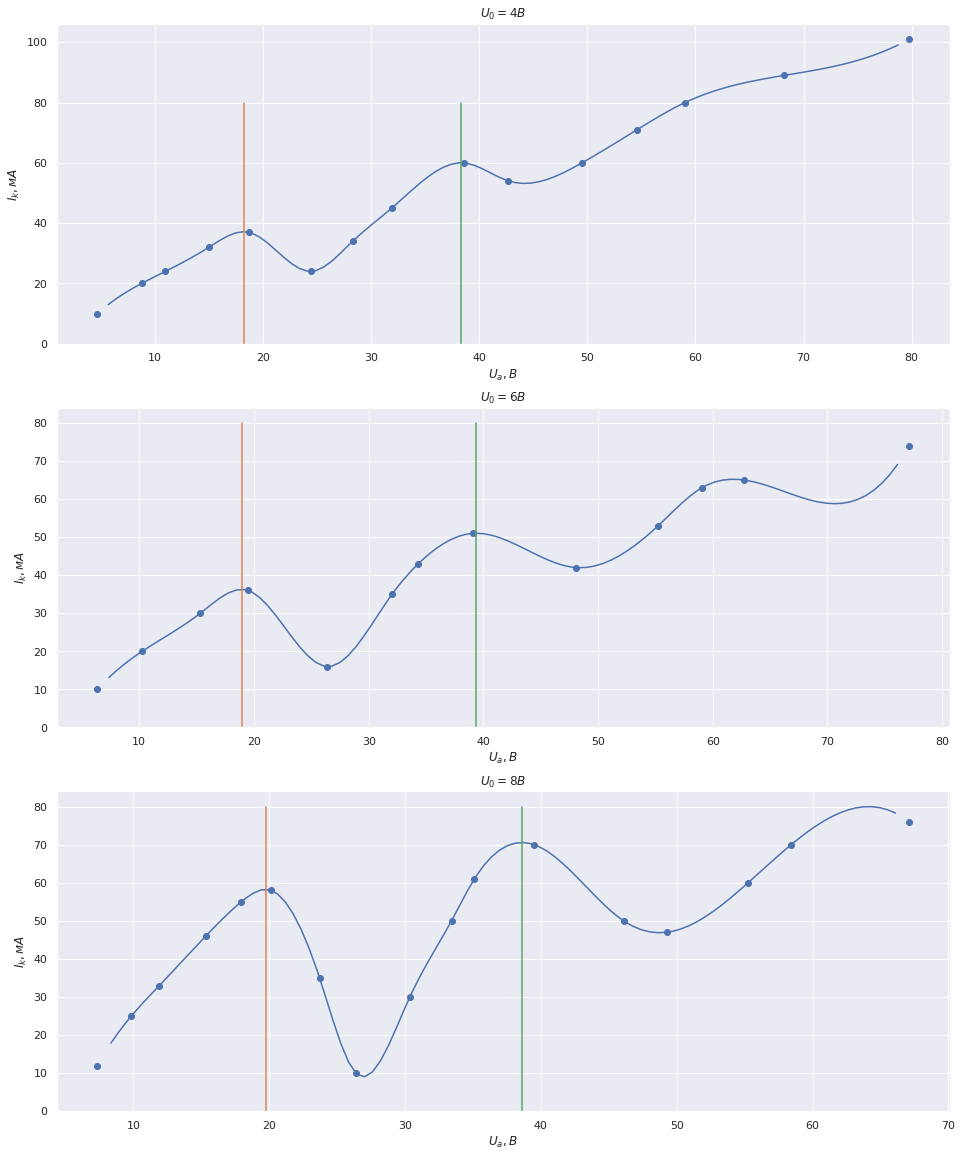

In [72]:
# Статический метод
stat_data = pd.read_excel("stat.xlsx")
U_0s = stat_data["U_0"].unique()
series = [stat_data[stat_data["U_0"] == val] for val in U_0s]
fig, axes = plt.subplots(3, figsize=(16, 20))
Es = []
for i in range(len(series)):
    X, Y = series[i]["U"].values, series[i]["I"].values
    f = interp1d(X, Y, kind='cubic')
    axes[i].plot(X, Y, "bo")
    a = np.linspace(min(X)+1, max(X)-1, 100)
    axes[i].plot(a, f(a))
    max1, max2 = minimize(lambda x: -f(x), 20).x[0], minimize(lambda x: -f(x), 40).x[0]
    axes[i].plot([max1]*100, np.linspace(0, 80, 100))
    axes[i].plot([max2]*100, np.linspace(0, 80, 100))
    axes[i].set_ylim(0)
    axes[i].set_xlabel("$U_a, В$")
    axes[i].set_ylabel("$I_k, мА$")
    axes[i].set_title("$U_0=$"+str(series[i]["U_0"].values[0])+"$В$")
    Es.append(max2-max1)
E = sum(Es)/len(Es)

In [73]:
print("E = {:.3}".format(E), "+-", "{:.1}".format(0.05), "Эв")

E = 19.8 +- 0.05 Эв
